In [1]:
import SimpleITK as sitk
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import nibabel as nib


In [14]:
#slice前の検証(nib)
seg_path="C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal"
# vol_path = os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00" + str(cid).zfill(3), "imaging.nii.gz")

for i in tqdm_notebook(range(210)):
#     seg_list=glob.glob(os.path.join(vol_path, f'case_00{str(i).zfill(3)}/*/*.mha'))
    seg3=0
    seg=os.path.join("C:/Users/higuchi/Desktop/kits19/data/case_00" + str(i).zfill(3), "segmentation.nii.gz")
    seg = nib.load(seg)
    seg_img = seg.get_data()
    print('cid:',i,'including 0 size is:',len(seg_img[seg_img==0]))
    print('cid:',i,'including 1 size is:',len(seg_img[seg_img==1]))
    print('cid:',i,'including 2 size is:',len(seg_img[seg_img==2]))
    print('cid:',i,'including 3 size is:',len(seg_img[seg_img==3]))
    

"""
slice前には存在していない。
保存時に起こってしまっている…?
"""

cid: 0 including 0 size is: 159235814
cid: 0 including 1 size is: 915679
cid: 0 including 2 size is: 18491
cid: 0 including 3 size is: 0
cid: 1 including 0 size is: 156299704
cid: 1 including 1 size is: 1488213
cid: 1 including 2 size is: 22771
cid: 1 including 3 size is: 0
cid: 2 including 0 size is: 67765657
cid: 2 including 1 size is: 614297
cid: 2 including 2 size is: 39630
cid: 2 including 3 size is: 0
cid: 3 including 0 size is: 70227608
cid: 3 including 1 size is: 537300
cid: 3 including 2 size is: 13972
cid: 3 including 3 size is: 0
cid: 4 including 0 size is: 16656969
cid: 4 including 1 size is: 115306
cid: 4 including 2 size is: 4941
cid: 4 including 3 size is: 0
cid: 5 including 0 size is: 217599485
cid: 5 including 1 size is: 902167
cid: 5 including 2 size is: 126444
cid: 5 including 3 size is: 0
cid: 6 including 0 size is: 40905203
cid: 6 including 1 size is: 244989
cid: 6 including 2 size is: 6416
cid: 6 including 3 size is: 0
cid: 7 including 0 size is: 15776946
cid: 7 i

KeyboardInterrupt: 

In [10]:
import pandas as pd
import numpy as np
seg_path="C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal"
# vol_path = os.path.join(r"C:\Users\higuchi\Desktop\kits19\data\case_00" + str(cid).zfill(3), "imaging.nii.gz")
df=pd.DataFrame(np.zeros(shape=(210,1)))
for i in tqdm_notebook(range(210)):
#     seg_list=glob.glob(os.path.join(vol_path, f'case_00{str(i).zfill(3)}/*/*.mha'))
    seg3=0
    seg=os.path.join("C:/Users/higuchi/Desktop/kits19/data/case_00" + str(i).zfill(3), "segmentation.nii.gz")
    seg_img =sitk.ReadImage(seg)
    seg_img = sitk.GetArrayFromImage(seg_img)
#     print('cid:',i,'including 0 size is:',len(seg_img[seg_img==0]))
#     print('cid:',i,'including 1 size is:',len(seg_img[seg_img==1]))
#     print('cid:',i,'including 2 size is:',len(seg_img[seg_img==2]))
    df.iat[i,0]=round(len(seg_img[seg_img==2])/len(seg_img[seg_img==1]),3)
#     print('cid:',i,'including 3 size is:',len(seg_img[seg_img==3]))
    

"""
slice前には存在していない。
保存時に起こってしまっている…?
"""

'\nslice前には存在していない。\n保存時に起こってしまっている…?\n'

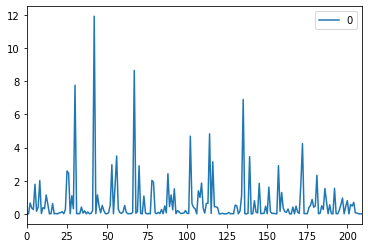

In [34]:
print(df2.iloc[120,0],df2.iloc[30,0])

0.002639455782312926 7.759761403508768


In [26]:
df[0].sort_values(ascending=True).head(5)

120    0.003
165    0.003
19     0.003
72     0.004
201    0.004
Name: 0, dtype: float64

In [30]:
df2[0].sort_values(ascending=True).head(5)

0      0.0
124    0.0
125    0.0
126    0.0
127    0.0
Name: 0, dtype: float64

In [24]:
df2[0].sort_values(ascending=False).head(5)

203    1.519
2      1.464
117    1.443
30     1.375
78     1.303
Name: 0, dtype: float64

In [23]:
df[0].sort_values(ascending=False).head(5)

30     7.083
67     4.170
42     3.913
88     2.701
114    2.443
Name: 0, dtype: float64

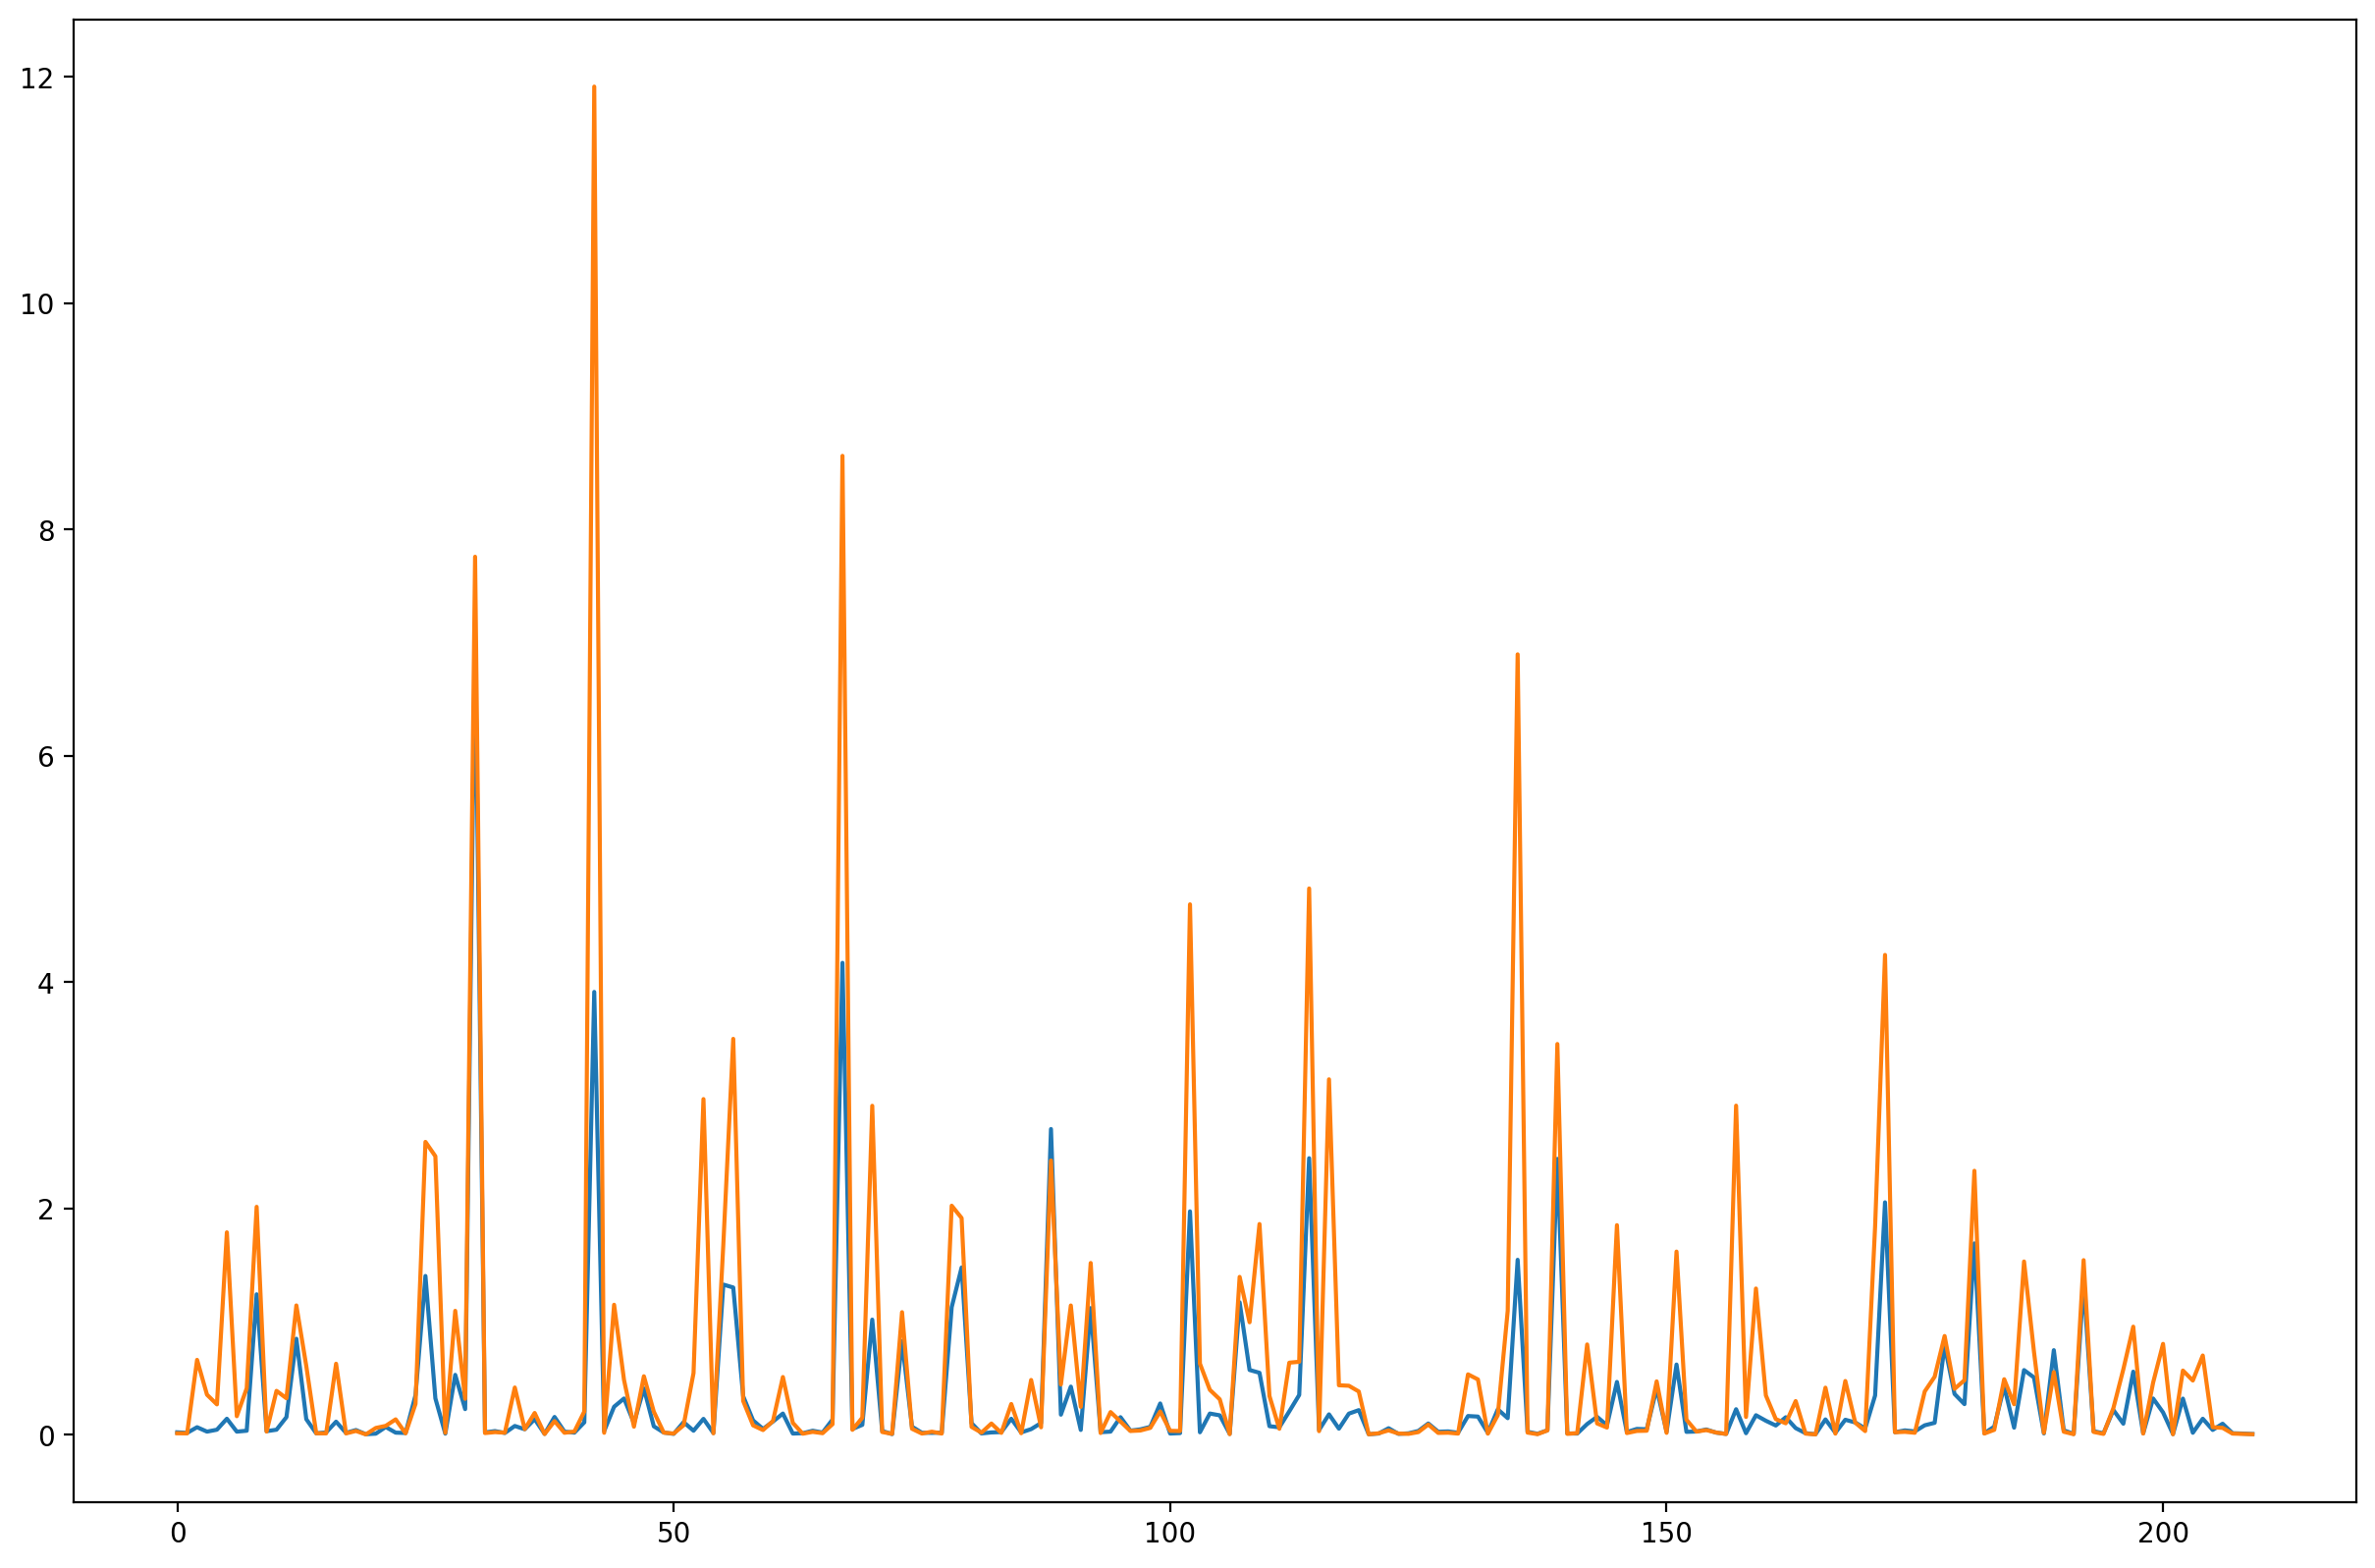

In [42]:
import matplotlib.pyplot as plt
from pylab import rcParams
# rcParams['figure.figsize'] = 18,10

#腎臓とがんの比率
#pltを使うと両方をグラフにできる
figure=plt.figure(figsize=(15,10),dpi=200)
plt.plot(df)
plt.plot(df2)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [32]:
#slice後の検証
seg_path="C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal2"
df2=pd.DataFrame(np.zeros(shape=(210,1)))

for i in tqdm_notebook(range(210)):
    seg_list=glob.glob(os.path.join(seg_path, f'case_00{str(i).zfill(3)}/*/*.mha'))
    ratio=0
    for seg in seg_list:
        seg = sitk.ReadImage(seg)
        seg_img = sitk.GetArrayFromImage(seg)
        ratio+=round(len(seg_img[seg_img==2])/len(seg_img[seg_img==1]),3)
    ratio/=len(seg_list)
    df2.iat[i,0]=ratio

    


    

In [30]:
np.set_printoptions(edgeitems=100)
for seg in label_list:
    plt.figure()
    seg = sitk.ReadImage(seg)
    seg_img = sitk.GetArrayFromImage(seg)
    print(len(seg_img[seg_img==0]))
    print(len(seg_img[seg_img==1]))
    print(len(seg_img[seg_img==2]))
    print(len(seg_img[seg_img==3]))
    print()
    
#     plt.imshow(seg_img, cmap='Greys_r', origin='lower')
#     print(np.max(seg_img))




16262
56
66
0

64729
355
450
2

61577
735
3222
2

61333
762
3441
0

61081
810
3642
3

60864
837
3834
1

60755
836
3938
7

60458
1136
3940
2

60001
1260
4269
6

64243
403
889
1

63853
431
1251
1

63331
764
1433
8

62918
668
1945
5

62521
643
2370
2

62194
647
2689
6

62001
660
2873
2

61750
704
3077
5



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
label_list

['C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label0.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label1.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label10.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label11.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label12.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label13.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label14.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label15.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label16.mha',
 'C:/Users/higuchi/Desktop/LAB/201906_/segmentation/data/label_sagittal\\case_00104/1\\label2